# Получаем курсы валют по API

**Задача:** получить актуальные значения курса валют на данный момент с использованием API.

**Цель:** разобраться в принципах использования API.

## Получим набор данных с сайта *cbr-xml-daily.ru*

Подключаем библиотеки для осуществеления запроса и для преобразования результата в датафрейм пандас.

In [182]:
import requests
import pandas as pd
from datetime import datetime

Получаем данные по API

In [183]:
data_json = requests.get('https://www.cbr-xml-daily.ru/daily_json.js').json()

Преобразовываем полученый JSON в DataFrame.

In [184]:
data_valute = pd.DataFrame(data_json['Valute'])
#Оставим только данные о некоторых валютах.
data_valute = data_valute[['USD', 'EUR', 'BYN', 'KZT', 'KRW']]
#транспонируем для удобства
data_valute = data_valute.T

Добавим нормализинованные столбцы Value

In [185]:
data_valute['текущее_значение'] = data_valute['Value']/data_valute['Nominal']
data_valute['предыдущее_значение'] = data_valute['Previous']/data_valute['Nominal']

## Выведем полученные данные

<Axes: title={'center': 'Актуальные курсы валют на 2024-02-23 11:30:00'}>

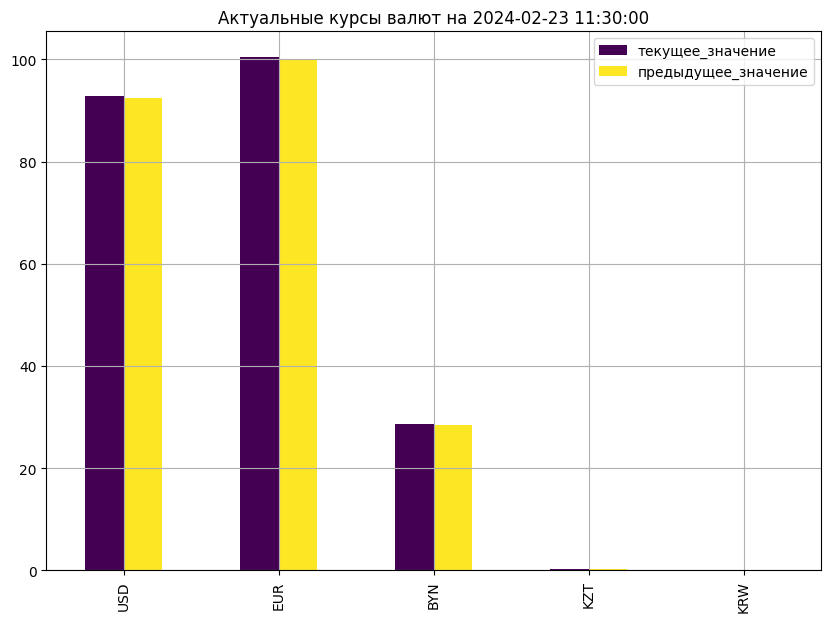

In [186]:
#скорректируем формат даты
actual_date = datetime.strptime(data_json['Date'].split('+')[0], "%Y-%m-%dT%H:%M:%S")

data_valute[['текущее_значение', 'предыдущее_значение']].plot(kind='bar',
                                                              title = 'Актуальные курсы валют на ' + str(actual_date),
                                                              figsize = [10, 7],
                                                              colormap = 'viridis',
                                                              grid = True
                                                              )

In [188]:
#выведем заголовок
print('Актуальные курсы валют на ' + str(actual_date))

#преобразуем типы для округления
data_valute['текущее_значение'] = data_valute['текущее_значение'].astype(float)
data_valute['предыдущее_значение'] = data_valute['предыдущее_значение'].astype(float)

#выведем таблицу
data_valute[['текущее_значение', 'предыдущее_значение']].round(3)

Актуальные курсы валют на 2024-02-23 11:30:00


,текущее_значение,предыдущее_значение
USD,92.752,92.439
EUR,100.442,99.897
BYN,28.564,28.545
KZT,0.206,0.204
KRW,0.070,0.069
